Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



In [1]:
# Importing required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 
import warnings 
warnings.simplefilter(action='ignore',category=FutureWarning)


In [2]:
# Importing dataset

ci = pd.read_csv(r"C:\Users\SREEDHAR\Documents\Data science\ML projects\census_income.csv")

In [3]:
#printing 1st five rows
ci.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
ci.shape

(32560, 15)

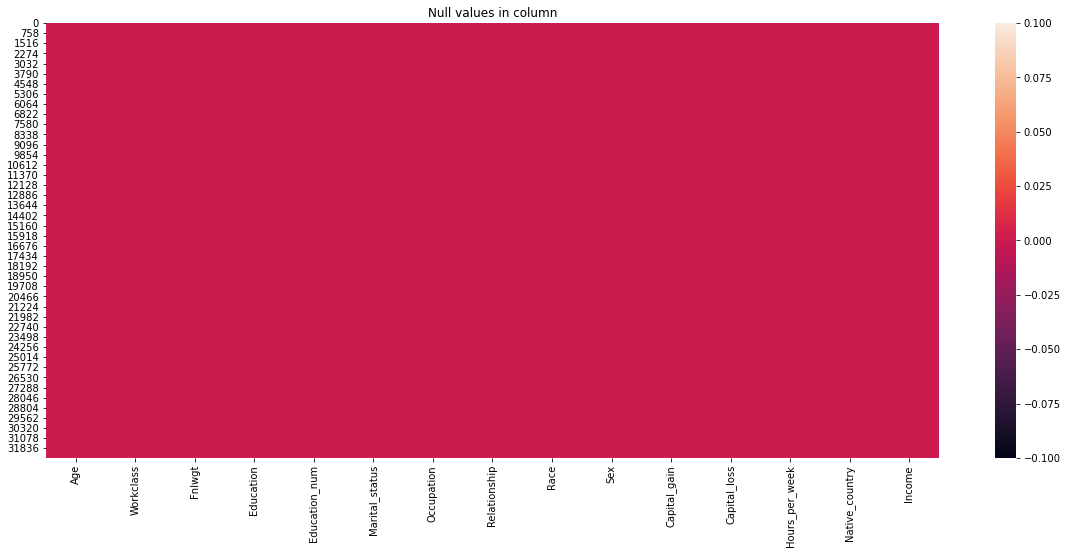

In [5]:
# Visual Representaion of missing values in cabin and Age column
plt.figure(figsize=(20,8))
sns.heatmap(ci.isnull())
plt.title("Null values in column")
plt.show()

### No null values

there are no nan values but there are '?' in some columns. Need to fill this columns

In [6]:
ci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
ci['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [8]:
ci['Workclass'] = ci['Workclass'].replace(' ?', ' Private')

In [9]:
ci['Workclass'].value_counts()

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [10]:
ci['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [11]:
ci['Occupation'] = ci['Occupation'].replace(' ?',' Prof-specialty' )

In [12]:
ci['Occupation'].value_counts()

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [13]:
ci['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [14]:
ci['Native_country'] = ci['Native_country'].replace(' ?', ' United-States')

In [15]:
ci['Native_country'].value_counts()

 United-States                 29752
 Mexico                          643
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 France                           29
 

In [16]:
ci['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

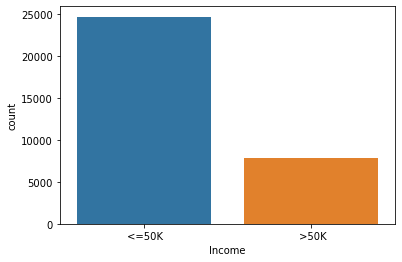

In [17]:
sns.countplot(ci['Income'])
plt.show()

imbalanced label column as more counts with less than or equal to 50K

In [18]:
ci.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

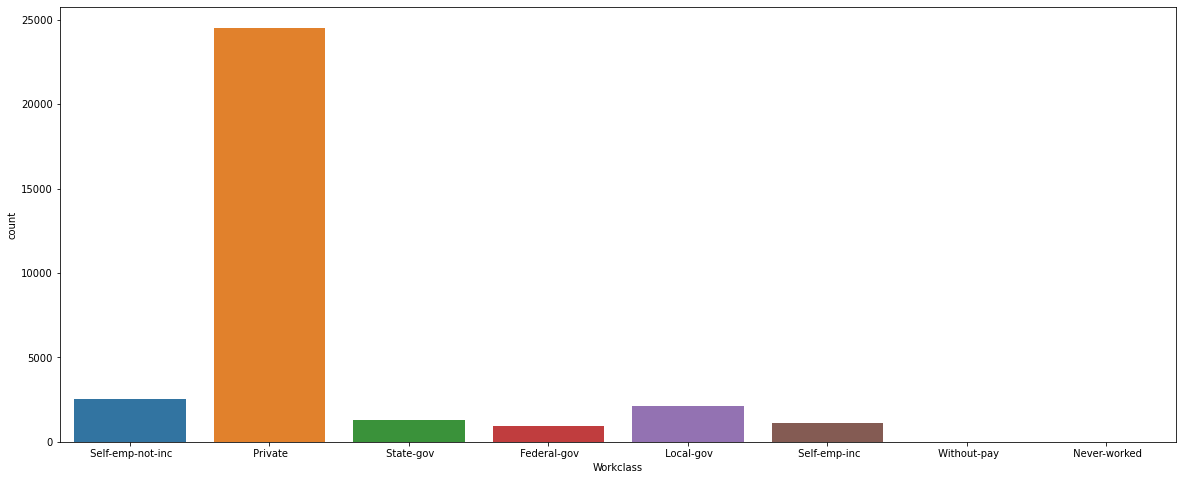

In [19]:
plt.figure(figsize = (20,8))
sns.countplot(ci['Workclass'])
plt.show()

Most of the employees work in private sector only

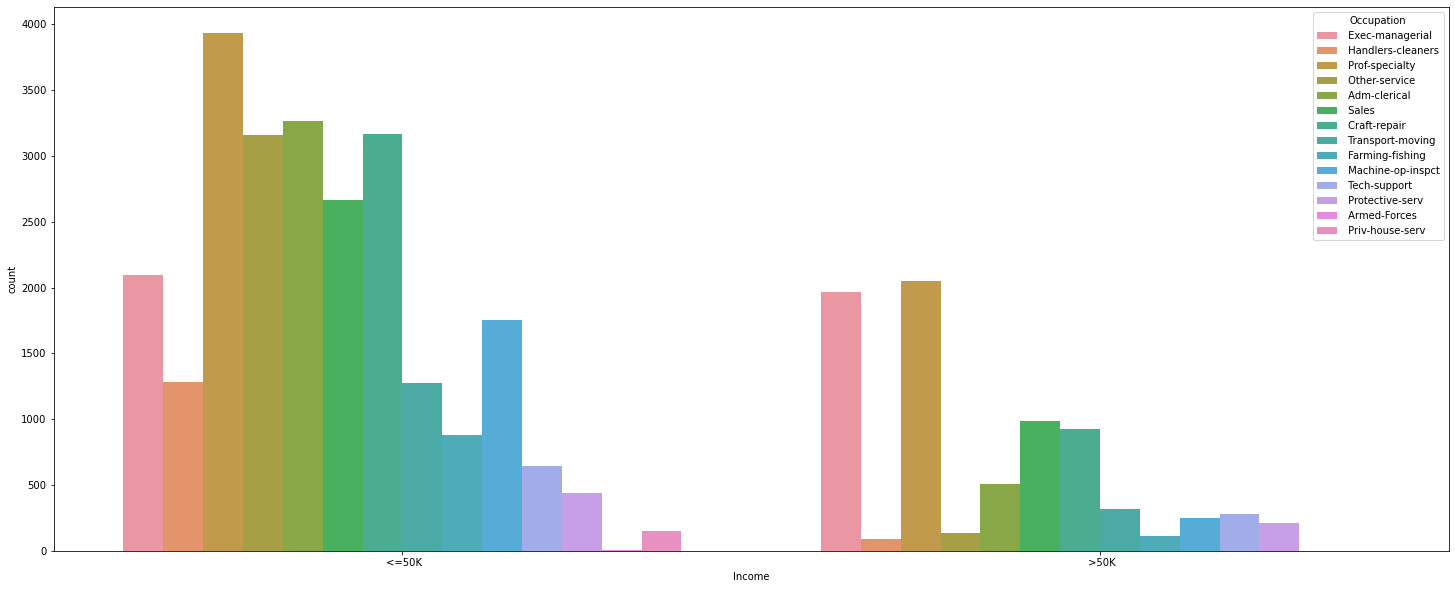

In [20]:
plt.figure(figsize = (25,10))
sns.countplot(x = 'Income', hue = 'Occupation', data = ci, saturation=0.75)

plt.show()

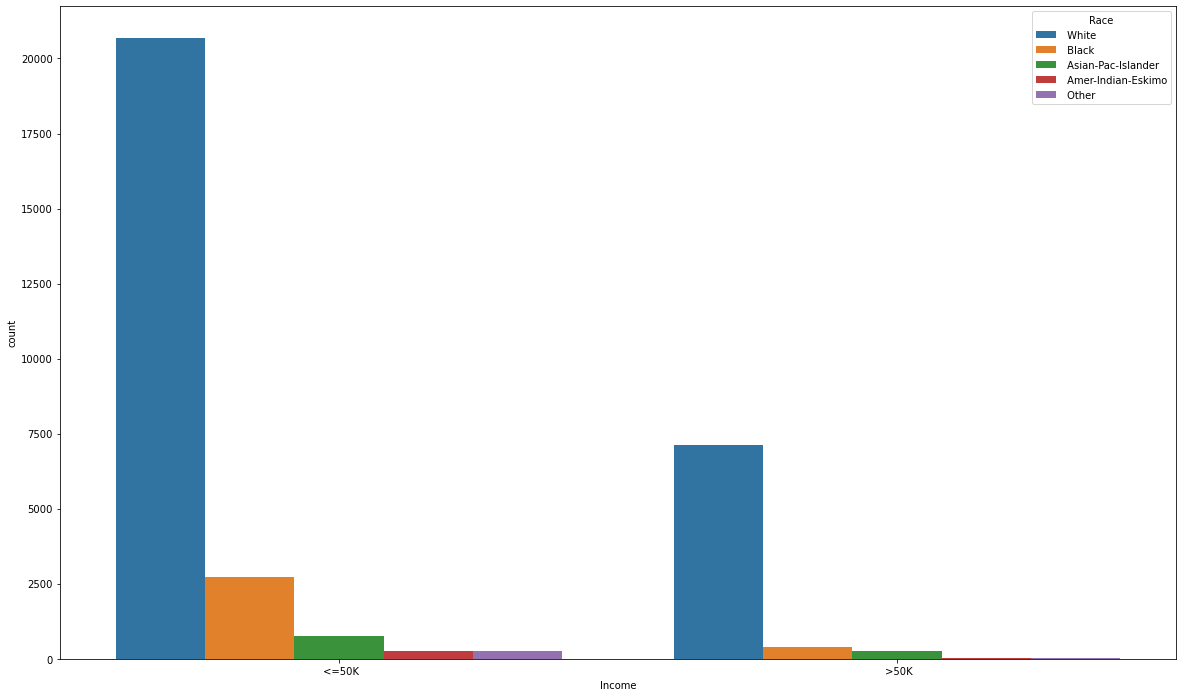

In [21]:

plt.figure(figsize = (20,12))
sns.countplot(x = 'Income', hue = 'Race', data = ci, saturation=0.75)

plt.show()

there is less percentage of black / Asian / Amer-Indian Peoples in >50K

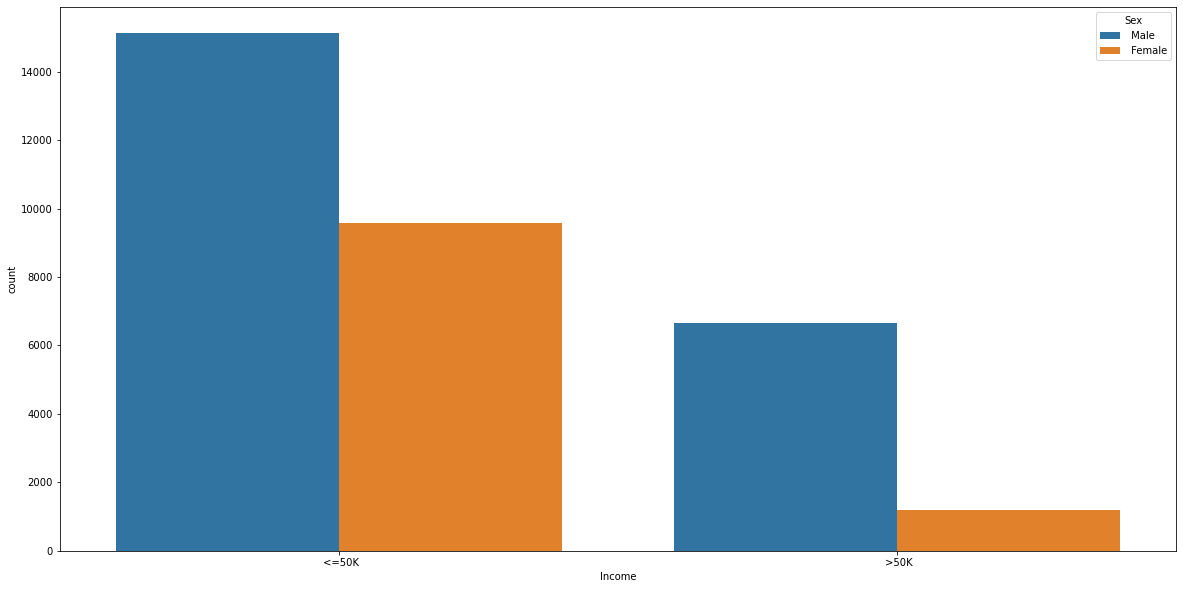

In [22]:

plt.figure(figsize = (20,10))
sns.countplot(x = 'Income', hue = 'Sex', data = ci, saturation=0.75)

plt.show()

Female ratio is higher in <=50k than in >50K

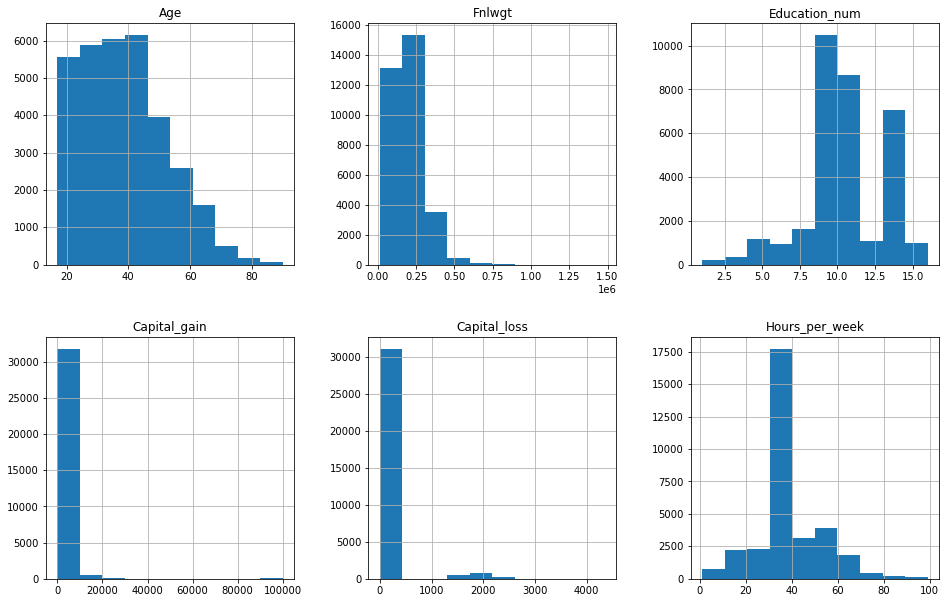

In [23]:
ci.hist(figsize = (16,16), layout = (3,3))
plt.show()

* age is highly distributed between 20-50
* Fnlwt is whighly ditrubuted between 0 to 0.5 
* more number more number of people working for 30- 35 HRs per week

In [24]:
ci.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


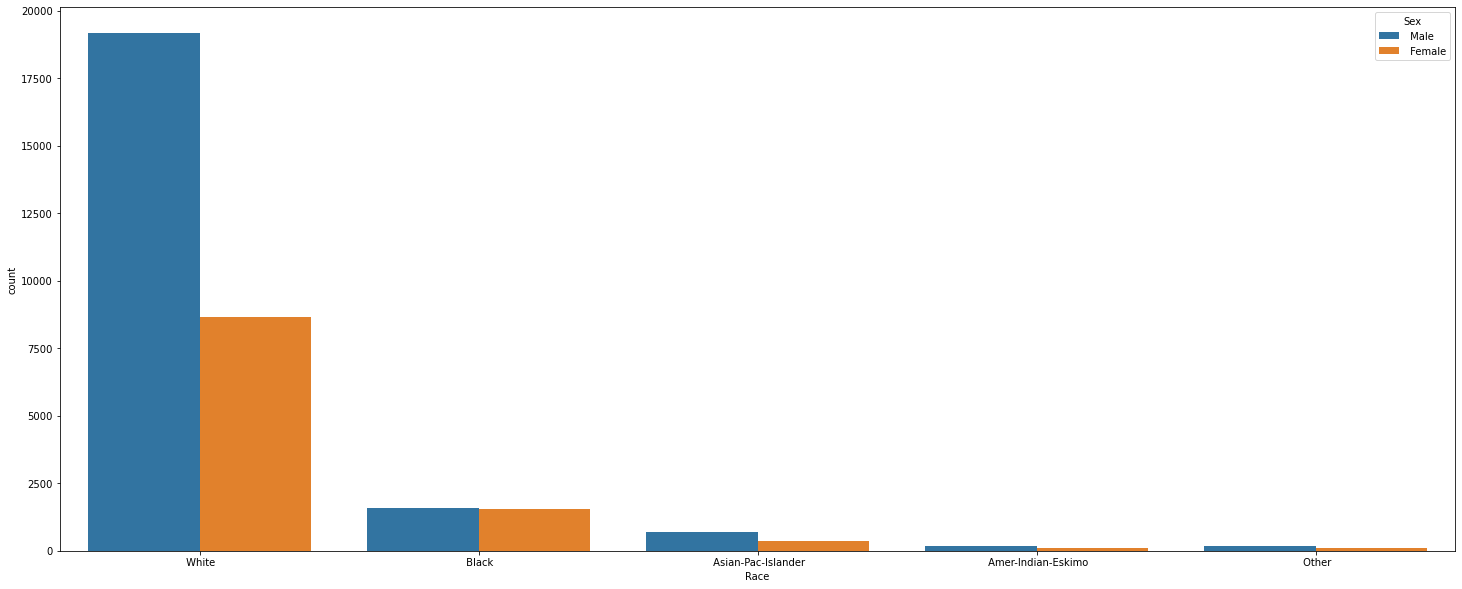

In [25]:
plt.figure(figsize = (25,10))
sns.countplot(x = 'Race', hue = 'Sex', data = ci, saturation=0.75)

plt.show()

Gender ratio in case of black people is much better than white and others

In [26]:
ci.Workclass.unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [27]:
ci.groupby(['Education', 'Income']).size()

Education      Income
 10th           <=50K     871
                >50K       62
 11th           <=50K    1115
                >50K       60
 12th           <=50K     400
                >50K       33
 1st-4th        <=50K     162
                >50K        6
 5th-6th        <=50K     317
                >50K       16
 7th-8th        <=50K     606
                >50K       40
 9th            <=50K     487
                >50K       27
 Assoc-acdm     <=50K     802
                >50K      265
 Assoc-voc      <=50K    1021
                >50K      361
 Bachelors      <=50K    3133
                >50K     2221
 Doctorate      <=50K     107
                >50K      306
 HS-grad        <=50K    8826
                >50K     1675
 Masters        <=50K     764
                >50K      959
 Preschool      <=50K      51
 Prof-school    <=50K     153
                >50K      423
 Some-college   <=50K    5904
                >50K     1387
dtype: int64

There is huge gap in almost all the columns except for Bachelors, masters and doctorate.

Also in case of Doctorate and Masters percentage of people earning more than 50k is more, rest of columns has more people with less than 50K

In [28]:
ci.Education.unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [29]:
# Saggrigating unique values in Education 

ci['Education'].replace([' 11th', ' 9th', ' 7th-8th', ' 5th-6th',' 10th', ' 1st-4th', ' 12th' ], 'school', inplace = True)
ci['Education'].replace([' Assoc-acdm', ' Assoc-voc',' Prof-school',' Some-college'], 'Highchool', inplace = True)


In [30]:
ci.Education.unique()

array([' Bachelors', ' HS-grad', 'school', ' Masters', 'Highchool',
       ' Doctorate', ' Preschool'], dtype=object)

In [31]:

ci.Occupation.unique()

array([' Exec-managerial', ' Handlers-cleaners', ' Prof-specialty',
       ' Other-service', ' Adm-clerical', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [32]:
# Using Label endcoder to convert all categorical columns into Integer

from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

ci['Workclass'] = lab.fit_transform(ci['Workclass'])
ci['Education'] = lab.fit_transform(ci['Education'])
ci['Marital_status'] = lab.fit_transform(ci['Marital_status'])
ci['Occupation'] = lab.fit_transform(ci['Occupation'])
ci['Relationship'] = lab.fit_transform(ci['Relationship'])
ci['Race'] = lab.fit_transform(ci['Race'])
ci['Sex'] = lab.fit_transform(ci['Sex'])
ci['Native_country'] = lab.fit_transform(ci['Native_country'])
ci['Income'] = lab.fit_transform(ci['Income'])

In [33]:
ci.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,0,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,2,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,6,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,0,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,3,14,2,3,5,4,0,0,0,40,38,0


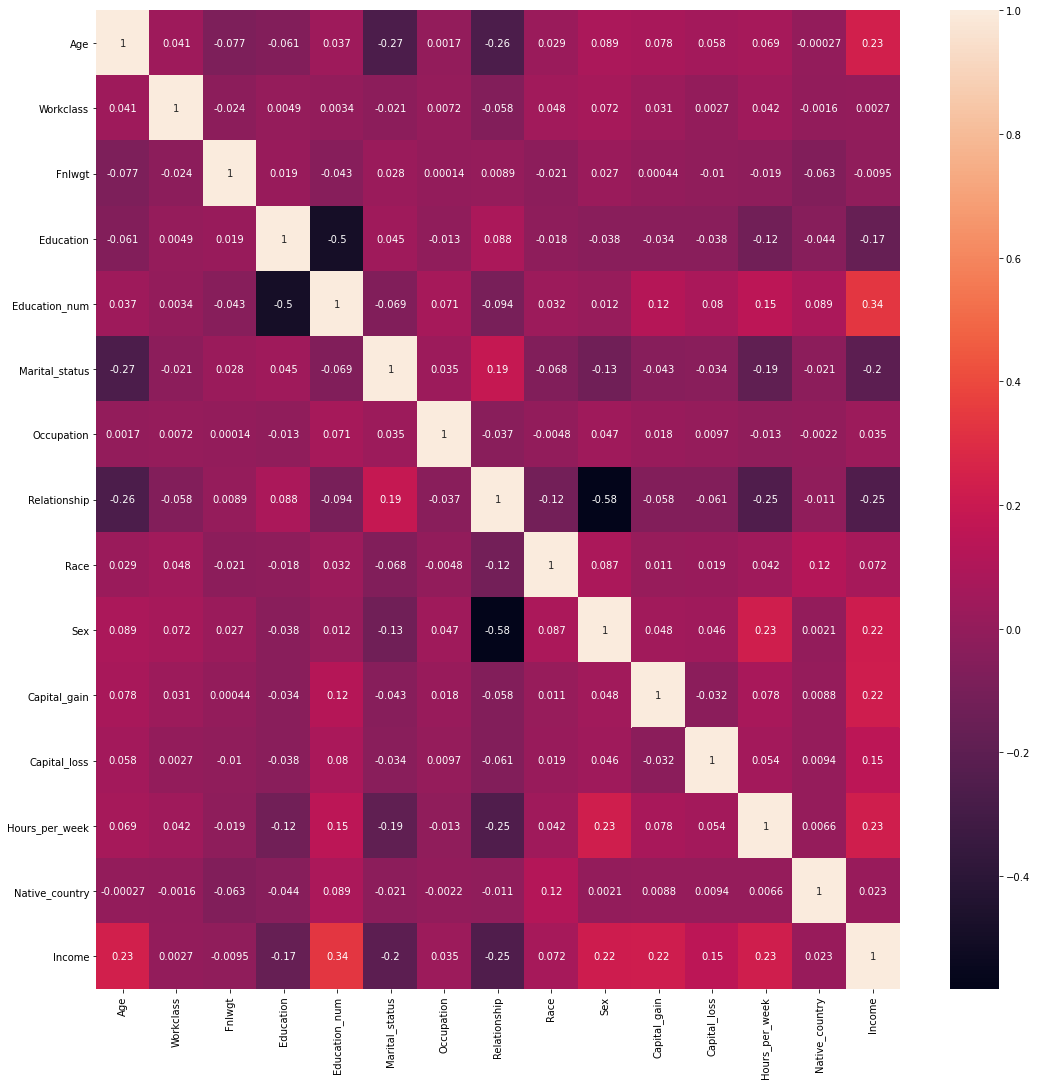

In [34]:
corr = ci.corr()

plt.figure(figsize = (18,18))
sns.heatmap(corr, annot=True)
plt.show()

* Correlation matrix shows that Hours_per_week, Capital_loss, capital gain, Sex ,age are positively correlated with the target 

* While Education, martial Stetus , Relationship are Negatively correlated with Target variable.

* Column Fnlwgt shows very low co-relation with the target variable and also with other features



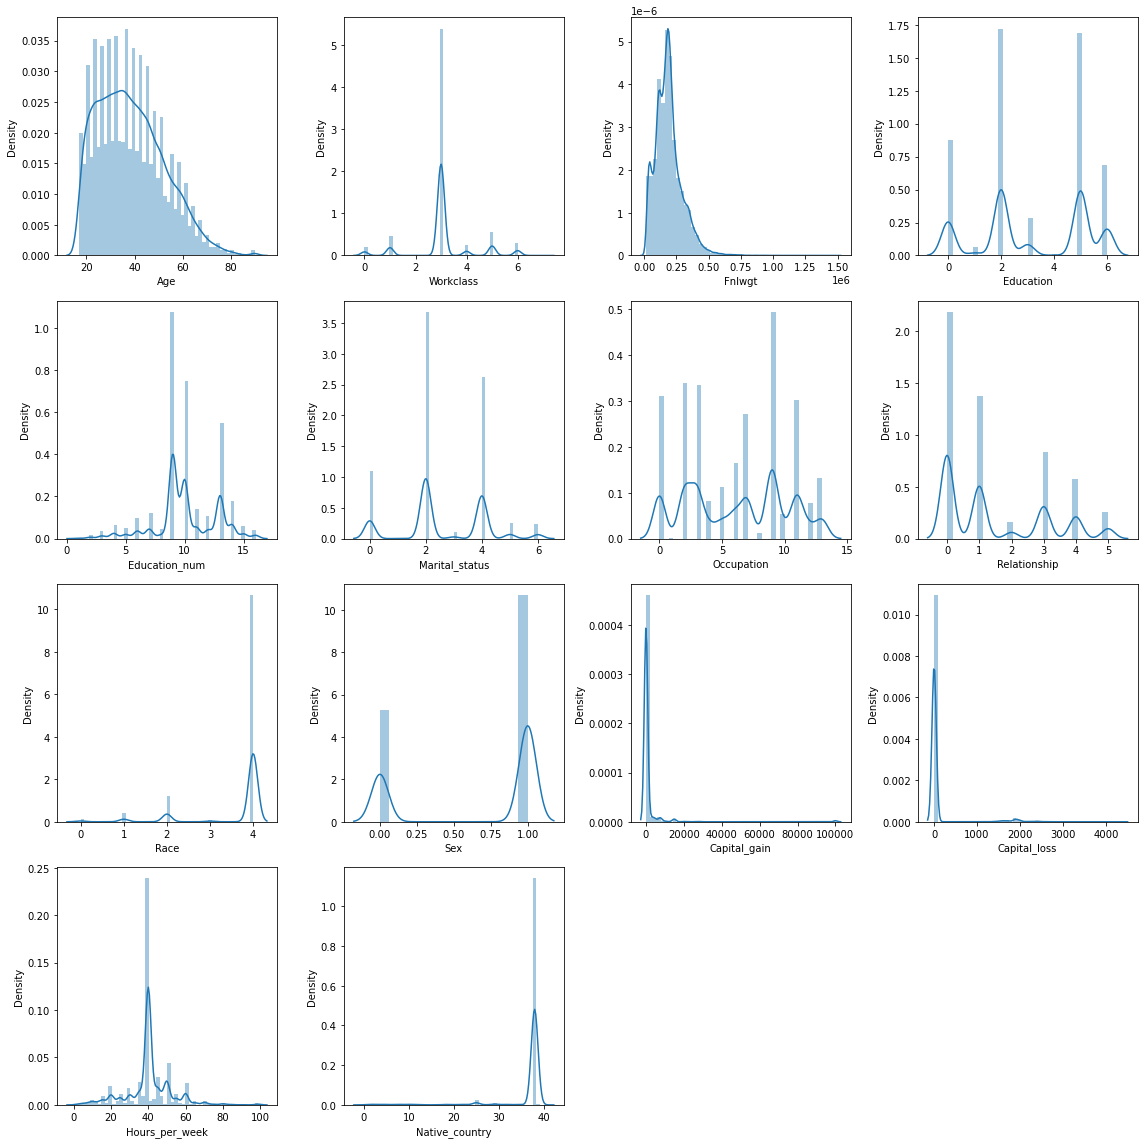

In [35]:
# Checking data Distribution

plt.figure(figsize = (16,16), facecolor = 'white')

plotnum = 1

for column in ci:
    if plotnum <=14:
        ax = plt.subplot(4,4, plotnum)
        sns.distplot(ci[column])
        plt.xlabel(column)
        
    plotnum+=1
    
plt.tight_layout()

There are many categorical columns but rest of our columns show skewness 
It needs to be removed before model building

In [36]:
ci.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

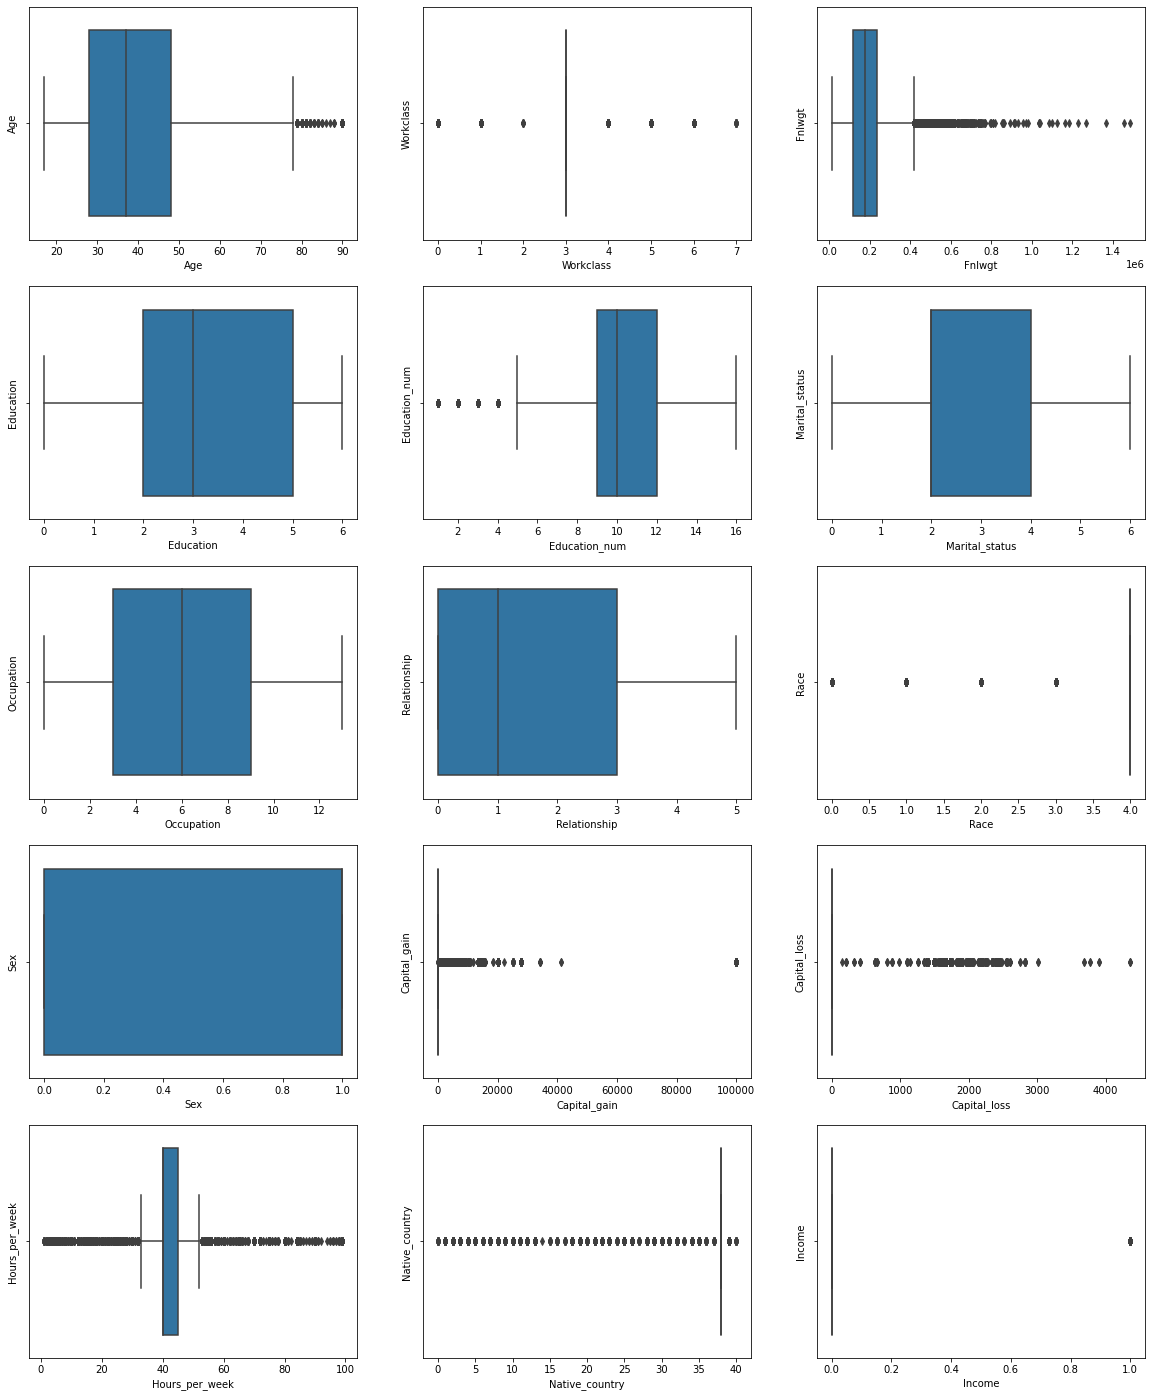

In [37]:
# Checking for outliers

plt.figure(figsize = (20,30))
graphs = 1

for column in ci:
    if graphs <=16:
        ax = plt.subplot(6,3,graphs)
        sns.boxplot(ci[column], orient ='h')
        plt.xlabel(column,fontsize=10)
        plt.ylabel(column,fontsize=10)
    graphs+=1   
plt.show()

Most of the columns showing outliers are categorical except for Fnlwgt . 

Still there need not be too extreme outlying values so removing outliers

In [38]:
ci.shape

(32560, 15)

In [39]:
# Removing outliers with Z-score


                 
from scipy.stats import zscore

z_score = zscore(ci[['Age','Fnlwgt','Education_num']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis=1)

ci= ci[filtering_entry]

In [40]:
ci.shape

(31884, 15)

In [41]:
# Checking data lost

print ('Data lost% is = ', ((32560-31884)/31884)*100 , '%')

Data lost% is =  2.12018567306486 %


In [42]:
x = ci.drop(ci[['Income']], axis = 1 )
y = ci['Income']

In [43]:
# Spiltting data into training and testing
# Checking for best random state using Log regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


In [44]:
maxAcc = 0
maxRS=0

for i in range(0,400):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predf=LR.predict(x_test)
    acc=accuracy_score(y_test, predf)
    
    if acc>maxAcc:
        maxAcc=acc
        macRS = i
print('Best Accuracy is=',maxAcc, "Random state=",macRS)    

    

C:\Users\SREEDHAR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SREEDHAR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

Best Accuracy is= 0.8068158059795107 Random state= 22


In [45]:
# we got Best Accuracy= 0.8068158059795107 Random state= 22

# Splitting data with best random state

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=22)


In [46]:
y_train.value_counts()

0    16838
1     5480
Name: Income, dtype: int64

<AxesSubplot:xlabel='Income', ylabel='count'>

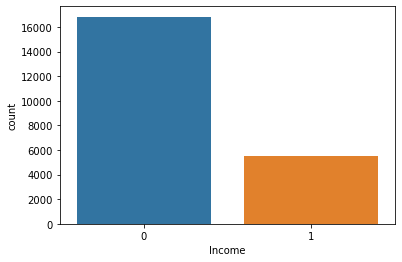

In [47]:
sns.countplot(x = y_train)

target column is not balanced. Need to balance it before model building

In [48]:
from collections import Counter
Counter(y_train)

Counter({1: 5480, 0: 16838})

In [49]:
import six
import joblib
import sys
sys.modules['sklearn.externals.six'] = six
sys.modules['sklearn.externals.joblib'] = joblib

In [50]:
# Importing SMOTE for OverSampling
from imblearn.over_sampling import SMOTE
sm = SMOTE()

ove_smp = SMOTE(0.80)

x_train_ns, y_train_ns = ove_smp.fit_resample(x_train,y_train)

print ("number of samples before fit{}".format(Counter(y_train))) 
print ("number of samples after fit{}".format(Counter(y_train_ns)))   


number of samples before fitCounter({0: 16838, 1: 5480})
number of samples after fitCounter({0: 16838, 1: 13470})


<AxesSubplot:xlabel='Income', ylabel='count'>

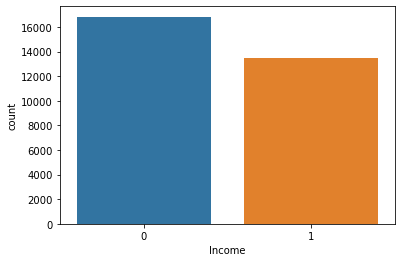

In [51]:
sns.countplot(x = y_train_ns)

target column is now somehow balanced than it was earlier

In [52]:
# ModeL building with Logistic Regression
LR.fit(x_train_ns,y_train_ns)

predict_=LR.predict(x_test)

print("Accuracy is",accuracy_score(y_test,predict_)*100)

print(confusion_matrix(y_test,predict_))
print(classification_report(y_test,predict_))


Accuracy is 79.45849885009409
[[6848  458]
 [1507  753]]
              precision    recall  f1-score   support

           0       0.82      0.94      0.87      7306
           1       0.62      0.33      0.43      2260

    accuracy                           0.79      9566
   macro avg       0.72      0.64      0.65      9566
weighted avg       0.77      0.79      0.77      9566



In [53]:
# ModeL building with Decision tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

dt.fit(x_train_ns,y_train_ns)
pred = dt.predict(x_test)

print("Accuracy is",accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))


Accuracy is 0.804306920342881
[[6223 1083]
 [ 789 1471]]
              precision    recall  f1-score   support

           0       0.89      0.85      0.87      7306
           1       0.58      0.65      0.61      2260

    accuracy                           0.80      9566
   macro avg       0.73      0.75      0.74      9566
weighted avg       0.81      0.80      0.81      9566



In [54]:
#ModeL building with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

rf.fit(x_train_ns,y_train_ns)
pred = rf.predict(x_test)

print('Accuracy is',accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy is 84.7167049968639
[[6550  756]
 [ 706 1554]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      7306
           1       0.67      0.69      0.68      2260

    accuracy                           0.85      9566
   macro avg       0.79      0.79      0.79      9566
weighted avg       0.85      0.85      0.85      9566



In [55]:
#ModeL building with SVC
from sklearn.svm import SVC
svc=SVC()

svc.fit(x_train_ns,y_train_ns)
new_pred = svc.predict(x_test)

print('Accuracy is',accuracy_score(y_test,new_pred)*100)
print(confusion_matrix(y_test,new_pred))
print(classification_report(y_test,new_pred))

Accuracy is 80.40978465398285
[[7221   85]
 [1789  471]]
              precision    recall  f1-score   support

           0       0.80      0.99      0.89      7306
           1       0.85      0.21      0.33      2260

    accuracy                           0.80      9566
   macro avg       0.82      0.60      0.61      9566
weighted avg       0.81      0.80      0.76      9566



In [56]:
#ModeL building with GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train_ns,y_train_ns)

y_pred = gbk.predict(x_test)

print ('Accuracy is=', accuracy_score(y_test, y_pred)*100)
print ('Confusion Matrix', confusion_matrix(y_test, y_pred))
print ('Classification Report', classification_report(y_test, y_pred))

Accuracy is= 85.0303157014426
Confusion Matrix [[6493  813]
 [ 619 1641]]
Classification Report               precision    recall  f1-score   support

           0       0.91      0.89      0.90      7306
           1       0.67      0.73      0.70      2260

    accuracy                           0.85      9566
   macro avg       0.79      0.81      0.80      9566
weighted avg       0.86      0.85      0.85      9566



In [57]:
# Cross Validation
from sklearn.model_selection import cross_val_score

scr = cross_val_score(LR, x,y, cv=8)
print("Cross-validation score with Logistic Regression is", scr.mean())
scr = cross_val_score(dt, x,y, cv=8)
print("Cross-validation score with Decision tree is", scr.mean())
scr = cross_val_score(rf, x,y, cv=8)
print("Cross-validation score with RandomForestClassifier is", scr.mean())
scr = cross_val_score(svc, x,y, cv=8)
print("Cross-validation score with SVC is", scr.mean())
scr = cross_val_score(gbk, x,y, cv=8)
print("Cross-validation score with GradientBoostingClassifier is", scr.mean())



C:\Users\SREEDHAR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\SREEDHAR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

Cross-validation score with Logistic Regression is 0.7897694235344408
Cross-validation score with Decision tree is 0.8094031903380778
Cross-validation score with RandomForestClassifier is 0.8555703824741678
Cross-validation score with SVC is 0.7947246668232162
Cross-validation score with GradientBoostingClassifier is 0.8623137458520128


Random Forest Classifier Performing better 

In [58]:
# HyperParameter Tunning with GridSearchCV

from sklearn.model_selection import GridSearchCV

parameters = {'max_features':['auto','sqrt','log'],
             'max_depth':[4,5,6,7,8,9,12,14],
              'min_samples_split':[1,2,4,5,6,8],
             'criterion':['gini','entropy']}

In [59]:
GCV = GridSearchCV(RandomForestClassifier(),parameters,cv=5, scoring='accuracy')
GCV.fit(x_train_ns,y_train_ns)

GCV.best_params_

C:\Users\SREEDHAR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
640 fits failed out of a total of 1440.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\SREEDHAR\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\SREEDHAR\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\SREEDHAR\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\SREEDHAR\anaconda3\l

{'criterion': 'gini',
 'max_depth': 14,
 'max_features': 'sqrt',
 'min_samples_split': 2}

In [60]:
GCV_pred = GCV.best_estimator_.predict(x_test) # predicting with best parameters



print('Accurecy',accuracy_score(y_test,GCV_pred)*100)
print(confusion_matrix(y_test,GCV_pred))
print(classification_report(y_test,GCV_pred))

Accurecy 85.08258415220573
[[6498  808]
 [ 619 1641]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      7306
           1       0.67      0.73      0.70      2260

    accuracy                           0.85      9566
   macro avg       0.79      0.81      0.80      9566
weighted avg       0.86      0.85      0.85      9566



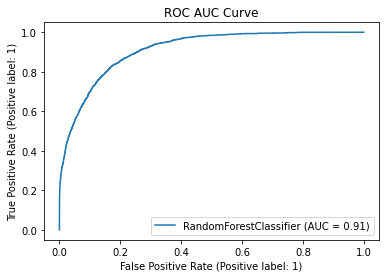

In [61]:
# ROC AUC Curve
from sklearn.metrics import plot_roc_curve

plot_roc_curve(GCV.best_estimator_,x_test, y_test)

plt.title("ROC AUC Curve")

plt.show()

In [62]:
# Saving Model
import joblib


joblib.dump(GCV.best_estimator_,"Census_Income_project.pkl")

['Census_Income_project.pkl']